# Análisis exploratorio de la base de datos coffee

Este notebook conecta a la base de datos MySQL local (`coffee`) y realiza consultas exploratorias y agregaciones básicas.


In [134]:
# Imports y configuración
import pandas as pd
import numpy as np
import mysql.connector
from mysql.connector import Error
import matplotlib.pyplot as plt
import warnings

# Cambia estos parámetros si tu conexión es diferente (se han tomado de crearDb.py)
DB_CONFIG = {
    'host': 'localhost',
    'database': 'coffee',
    'user': 'analitica',
    'password': 'Operador1704'
}

def get_connection():
    """Crea y retorna una conexión a la base de datos"""
    return mysql.connector.connect(**DB_CONFIG)

print("✅ Configuración lista")

✅ Configuración lista


In [135]:
# Listar tablas y contar filas por tabla
try:
    conn = get_connection()
    cursor = conn.cursor()
    cursor.execute("SHOW TABLES")
    tables = [r[0] for r in cursor.fetchall()]
    print('📊 Tablas encontradas:', tables)
    print('\n' + '-'*50)
    print('Conteo de filas por tabla:')
    print('-'*50)
    counts = {}
    for t in tables:
        cursor.execute(f"SELECT COUNT(*) FROM `{t}`")
        counts[t] = cursor.fetchone()[0]
        print(f'  {t:30s}: {counts[t]:>10,} filas')
    print('-'*50)
finally:
    cursor.close()
    conn.close()

📊 Tablas encontradas: ['countries', 'domestic_consumption', 'exports', 'importer_consumption', 'imports', 'production', 're_exports']

--------------------------------------------------
Conteo de filas por tabla:
--------------------------------------------------
  countries                     :         90 filas
  domestic_consumption          :         55 filas
  exports                       :         55 filas
  importer_consumption          :         35 filas
  imports                       :         35 filas
  production                    :         55 filas
  re_exports                    :         35 filas
--------------------------------------------------


In [136]:
# Cargar tablas clave en pandas para análisis
conn = None
loaded = {}
df_countries = None

try:
    conn = get_connection()

    data_tables = ['countries', 'production', 'imports', 'exports', 'domestic_consumption', 
                   'importer_consumption', 're_exports']
    
    print('Cargando tablas de datos...')
    print('-'*50)
    
    for table in data_tables:
        try:
            df = pd.read_sql(f'SELECT * FROM `{table}` LIMIT 50000', con=conn)
            loaded[table] = df
            print(f'✅ {table}: {df.shape}')
        except Exception as e:
            print(f'⚠️  {table}: {e}')
    
    print('-'*50)
finally:
    if conn is not None:
        conn.close()

Cargando tablas de datos...
--------------------------------------------------
✅ countries: (90, 2)
✅ production: (55, 34)
✅ imports: (35, 33)
✅ exports: (55, 33)
✅ domestic_consumption: (55, 34)
✅ importer_consumption: (35, 33)
✅ re_exports: (35, 33)
--------------------------------------------------


## Análisis exploratorio de datos (EDA)

Ahora analizaremos cada tabla cargada para entender la distribución de datos, identificar valores nulos, y explorar estadísticas descriptivas.


In [137]:
# Análisis de cada tabla
def analyze_table(table_name, df):
    print('\n' + '-'*50)
    print(f'📊 ANÁLISIS DE: {table_name.upper()}')
    print('-'*50)
    
    print(f'\n🔢 Dimensiones: {df.shape[0]:,} filas x {df.shape[1]} columnas')
    
    # Información de tipos de datos
    print('\n📝 Tipos de datos:')
    print(df.dtypes)
    
    # Valores nulos
    null_counts = df.isnull().sum()
    if null_counts.sum() > 0:
        print('\n⚠️  Valores nulos encontrados:')
        print(null_counts[null_counts > 0])
    else:
        print('\n✅ No hay valores nulos')
    
    # Estadísticas descriptivas de columnas numéricas
    numeric_cols = df.select_dtypes(include=['number']).columns
    if len(numeric_cols) > 0:
        print(f'\n📈 Estadísticas descriptivas ({len(numeric_cols)} columnas numéricas):')
        display(df[numeric_cols].describe())
    
    # Muestra de datos
    print('\n🔍 Primeras 2 filas:')
    display(df.head(2))

# Analizar cada tabla
for table_name, df in loaded.items():
    analyze_table(table_name, df)


--------------------------------------------------
📊 ANÁLISIS DE: COUNTRIES
--------------------------------------------------

🔢 Dimensiones: 90 filas x 2 columnas

📝 Tipos de datos:
id       int64
name    object
dtype: object

✅ No hay valores nulos

📈 Estadísticas descriptivas (1 columnas numéricas):


,id
count,90.000000
mean,45.500000
std,26.124701
min,1.000000
25%,23.250000
50%,45.500000
75%,67.750000
max,90.000000



🔍 Primeras 2 filas:


,id,name
0,1,Angola
1,2,Austria



--------------------------------------------------
📊 ANÁLISIS DE: PRODUCTION
--------------------------------------------------

🔢 Dimensiones: 55 filas x 34 columnas

📝 Tipos de datos:
id              int64
country_id      int64
coffee_type    object
1990/91         int64
1991/92         int64
1992/93         int64
1993/94         int64
1994/95         int64
1995/96         int64
1996/97         int64
1997/98         int64
1998/99         int64
1999/00         int64
2000/01         int64
2001/02         int64
2002/03         int64
2003/04         int64
2004/05         int64
2005/06         int64
2006/07         int64
2007/08         int64
2008/09         int64
2009/10         int64
2010/11         int64
2011/12         int64
2012/13         int64
2013/14         int64
2014/15         int64
2015/16         int64
2016/17         int64
2017/18         int64
2018/19         int64
2019/20         int64
total           int64
dtype: object

✅ No hay valores nulos

📈 Estadísticas descriptiva

,id,country_id,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,total
count,55.00000,55.000000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,...,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,28.00000,45.581818,1.017055e+08,1.104753e+08,1.074775e+08,1.001007e+08,1.017971e+08,9.525927e+07,1.127029e+08,1.089676e+08,...,1.541749e+08,1.649280e+08,1.679007e+08,1.639625e+08,1.703193e+08,1.770742e+08,1.785742e+08,1.881415e+08,1.800578e+08,4.104269e+09
std,16.02082,26.699765,2.510875e+08,2.668466e+08,3.022180e+08,2.489344e+08,2.510328e+08,1.858680e+08,2.602192e+08,2.430145e+08,...,4.469919e+08,4.931417e+08,5.030529e+08,4.918727e+08,5.059698e+08,5.225472e+08,5.135587e+08,5.851111e+08,5.390922e+08,1.112550e+10
min,1.00000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.080000e+06
25%,14.50000,22.500000,2.430000e+06,3.900000e+06,2.640000e+06,2.130000e+06,2.610000e+06,2.610000e+06,2.340000e+06,2.880000e+06,...,1.980000e+06,1.710000e+06,2.010000e+06,2.250000e+06,2.310000e+06,1.890000e+06,2.160000e+06,2.190000e+06,2.280000e+06,8.199000e+07
50%,28.00000,45.000000,2.766000e+07,2.778000e+07,3.000000e+07,2.652000e+07,2.436000e+07,2.604000e+07,2.406000e+07,1.800000e+07,...,2.094000e+07,2.004000e+07,1.548000e+07,1.488000e+07,1.758000e+07,1.620000e+07,1.584000e+07,1.860000e+07,1.842000e+07,6.236400e+08
75%,41.50000,66.500000,9.216000e+07,9.720000e+07,9.234000e+07,9.486000e+07,1.153200e+08,1.127700e+08,1.139700e+08,9.669000e+07,...,9.735000e+07,9.189000e+07,7.185000e+07,6.960000e+07,6.657000e+07,6.864000e+07,7.053000e+07,7.806000e+07,7.194000e+07,2.785140e+09
max,55.00000,90.000000,1.637160e+09,1.637580e+09,2.076180e+09,1.690020e+09,1.691520e+09,1.083600e+09,1.751820e+09,1.568880e+09,...,2.915520e+09,3.325080e+09,3.281340e+09,3.198300e+09,3.172260e+09,3.407280e+09,3.164400e+09,3.907860e+09,3.492660e+09,7.508298e+10



🔍 Primeras 2 filas:


,id,country_id,coffee_type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,total
0,1,1,Robusta/Arabica,3000000,4740000,4680000,1980000,4620000,3720000,4260000,...,1740000,1980000,2100000,2340000,2460000,2700000,2100000,2520000,3120000,82080000
1,2,5,Arabica,7380000,6240000,7200000,3060000,7020000,8520000,7500000,...,7920000,6300000,7200000,6000000,5040000,4680000,5040000,4980000,4860000,207000000



--------------------------------------------------
📊 ANÁLISIS DE: IMPORTS
--------------------------------------------------

🔢 Dimensiones: 35 filas x 33 columnas

📝 Tipos de datos:
id            int64
country_id    int64
1990          int64
1991          int64
1992          int64
1993          int64
1994          int64
1995          int64
1996          int64
1997          int64
1998          int64
1999          int64
2000          int64
2001          int64
2002          int64
2003          int64
2004          int64
2005          int64
2006          int64
2007          int64
2008          int64
2009          int64
2010          int64
2011          int64
2012          int64
2013          int64
2014          int64
2015          int64
2016          int64
2017          int64
2018          int64
2019          int64
total         int64
dtype: object

✅ No hay valores nulos

📈 Estadísticas descriptivas (33 columnas numéricas):


,id,country_id,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,total
count,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,...,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01
mean,18.000000,45.371429,1.270834e+08,1.221943e+08,1.357989e+08,1.322023e+08,1.286126e+08,1.240646e+08,1.334674e+08,1.389651e+08,...,1.916794e+08,1.940109e+08,1.987337e+08,2.057606e+08,2.080800e+08,2.187960e+08,2.161097e+08,2.227629e+08,2.313326e+08,5.069693e+09
std,10.246951,25.579272,2.543488e+08,2.435393e+08,2.690354e+08,2.424808e+08,2.178530e+08,2.188911e+08,2.415144e+08,2.500391e+08,...,3.363666e+08,3.404099e+08,3.453368e+08,3.539295e+08,3.511787e+08,3.667628e+08,3.684394e+08,3.678250e+08,3.854538e+08,8.850559e+09
min,1.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.970000e+07
25%,9.500000,26.000000,6.300000e+05,4.800000e+05,6.180000e+06,7.890000e+06,8.880000e+06,8.550000e+06,9.750000e+06,1.074000e+07,...,2.151000e+07,2.163000e+07,2.373000e+07,2.499000e+07,2.595000e+07,2.835000e+07,2.613000e+07,2.937000e+07,2.946000e+07,5.573100e+08
50%,18.000000,47.000000,3.444000e+07,3.150000e+07,3.618000e+07,4.008000e+07,4.626000e+07,3.798000e+07,4.458000e+07,4.362000e+07,...,5.712000e+07,6.456000e+07,6.378000e+07,6.360000e+07,6.264000e+07,6.804000e+07,6.564000e+07,6.960000e+07,7.320000e+07,1.640040e+09
75%,26.500000,67.500000,1.168500e+08,1.141200e+08,1.210200e+08,1.169700e+08,1.246500e+08,1.251600e+08,1.335000e+08,1.439100e+08,...,2.276100e+08,2.300700e+08,2.283900e+08,2.500500e+08,2.665800e+08,2.949900e+08,3.017100e+08,3.242400e+08,3.272400e+08,5.841240e+09
max,35.000000,85.000000,1.260420e+09,1.190400e+09,1.376340e+09,1.159740e+09,9.702600e+08,1.026420e+09,1.166700e+09,1.220580e+09,...,1.565580e+09,1.563360e+09,1.620960e+09,1.653900e+09,1.662480e+09,1.730280e+09,1.769280e+09,1.735080e+09,1.851240e+09,4.250766e+10



🔍 Primeras 2 filas:


,id,country_id,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,total
0,1,2,112800000,123480000,132360000,110160000,85020000,73860000,72600000,77640000,...,87120000,93540000,93300000,91500000,90780000,89700000,87600000,85740000,86880000,2765760000
1,2,3,0,0,0,0,0,0,0,0,...,349680000,340080000,330120000,312720000,332040000,363120000,340620000,344520000,371940000,6240540000



--------------------------------------------------
📊 ANÁLISIS DE: EXPORTS
--------------------------------------------------

🔢 Dimensiones: 55 filas x 33 columnas

📝 Tipos de datos:
id            int64
country_id    int64
1990          int64
1991          int64
1992          int64
1993          int64
1994          int64
1995          int64
1996          int64
1997          int64
1998          int64
1999          int64
2000          int64
2001          int64
2002          int64
2003          int64
2004          int64
2005          int64
2006          int64
2007          int64
2008          int64
2009          int64
2010          int64
2011          int64
2012          int64
2013          int64
2014          int64
2015          int64
2016          int64
2017          int64
2018          int64
2019          int64
total         int64
dtype: object

✅ No hay valores nulos

📈 Estadísticas descriptivas (33 columnas numéricas):


,id,country_id,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,total
count,55.00000,55.000000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,...,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,28.00000,45.581818,8.800800e+07,8.284691e+07,8.541382e+07,8.200036e+07,7.713600e+07,7.404436e+07,8.472982e+07,8.775055e+07,...,1.114767e+08,1.183015e+08,1.184389e+08,4.627702e+07,4.695557e+07,1.323622e+08,1.303887e+08,1.381047e+08,6.021884e+07,2.851332e+09
std,16.02082,26.699765,1.832890e+08,2.019180e+08,2.031566e+08,1.852049e+08,1.719033e+08,1.471032e+08,1.634044e+08,1.761129e+08,...,3.121420e+08,3.032438e+08,3.130926e+08,3.818677e+08,3.713066e+08,3.763857e+08,3.407518e+08,3.927493e+08,3.977899e+08,6.261177e+09
min,1.00000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,-2.147484e+09,-2.147484e+09,0.000000e+00,0.000000e+00,0.000000e+00,-2.147484e+09,1.500000e+06
25%,14.50000,22.500000,4.020000e+06,3.960000e+06,2.310000e+06,2.220000e+06,1.860000e+06,2.370000e+06,1.680000e+06,2.220000e+06,...,5.400000e+05,4.500000e+05,3.600000e+05,5.700000e+05,4.500000e+05,6.600000e+05,5.700000e+05,5.100000e+05,3.900000e+05,6.084000e+07
50%,28.00000,45.000000,1.578000e+07,9.300000e+06,9.960000e+06,1.308000e+07,9.180000e+06,1.200000e+07,9.360000e+06,1.218000e+07,...,7.920000e+06,8.220000e+06,4.200000e+06,3.720000e+06,3.540000e+06,4.560000e+06,3.480000e+06,6.660000e+06,3.180000e+06,3.160800e+08
75%,41.50000,66.500000,1.055700e+08,8.502000e+07,7.971000e+07,7.818000e+07,8.499000e+07,8.970000e+07,1.055100e+08,9.048000e+07,...,8.133000e+07,8.862000e+07,7.818000e+07,5.808000e+07,4.743000e+07,6.420000e+07,4.947000e+07,6.234000e+07,5.625000e+07,2.552670e+09
max,55.00000,90.000000,1.016160e+09,1.270980e+09,1.127460e+09,1.070280e+09,1.036380e+09,8.680800e+08,9.150600e+08,1.008060e+09,...,2.028360e+09,1.712940e+09,1.899060e+09,1.565820e+09,1.316640e+09,2.056140e+09,1.855500e+09,2.138220e+09,1.644000e+09,3.380771e+10



🔍 Primeras 2 filas:


,id,country_id,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,total
0,1,1,5040000,4260000,4800000,2340000,480000,2460000,3120000,3000000,...,480000,480000,360000,540000,660000,660000,540000,540000,1380000,43320000
1,2,5,9360000,4440000,5760000,2820000,5040000,5640000,7380000,6660000,...,4440000,3780000,3300000,3720000,1800000,1320000,1560000,1320000,1200000,137460000



--------------------------------------------------
📊 ANÁLISIS DE: DOMESTIC_CONSUMPTION
--------------------------------------------------

🔢 Dimensiones: 55 filas x 34 columnas

📝 Tipos de datos:
id              int64
country_id      int64
coffee_type    object
1990/91         int64
1991/92         int64
1992/93         int64
1993/94         int64
1994/95         int64
1995/96         int64
1996/97         int64
1997/98         int64
1998/99         int64
1999/00         int64
2000/01         int64
2001/02         int64
2002/03         int64
2003/04         int64
2004/05         int64
2005/06         int64
2006/07         int64
2007/08         int64
2008/09         int64
2009/10         int64
2010/11         int64
2011/12         int64
2012/13         int64
2013/14         int64
2014/15         int64
2015/16         int64
2016/17         int64
2017/18         int64
2018/19         int64
2019/20         int64
total           int64
dtype: object

✅ No hay valores nulos

📈 Estadísticas d

,id,country_id,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,total
count,55.00000,55.000000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,...,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,28.00000,45.581818,2.128278e+07,2.206701e+07,2.285613e+07,2.301590e+07,2.330200e+07,2.465735e+07,2.565010e+07,2.647750e+07,...,4.711907e+07,4.871183e+07,4.944423e+07,5.069858e+07,5.165367e+07,5.272819e+07,5.420271e+07,5.481235e+07,5.452530e+07,1.112487e+09
std,16.02082,26.699765,6.810062e+07,7.032839e+07,7.363077e+07,7.511769e+07,7.679945e+07,8.321743e+07,9.039443e+07,9.438905e+07,...,1.634943e+08,1.687185e+08,1.676074e+08,1.701179e+08,1.719262e+08,1.777393e+08,1.840522e+08,1.858924e+08,1.844917e+08,3.834783e+09
min,1.00000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,14.50000,22.500000,1.800000e+05,1.800000e+05,1.800000e+05,2.400000e+05,2.400000e+05,2.400000e+05,1.800000e+05,1.800000e+05,...,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,9.586920e+06
50%,28.00000,45.000000,2.040000e+06,3.000000e+06,3.000000e+06,2.400000e+06,3.000000e+06,3.000000e+06,3.000000e+06,3.000000e+06,...,4.020000e+06,4.302000e+06,4.408020e+06,4.519020e+06,4.560000e+06,4.620000e+06,4.680000e+06,4.200000e+06,4.290000e+06,1.216200e+08
75%,41.50000,66.500000,1.299000e+07,1.671300e+07,1.650000e+07,1.731000e+07,1.650000e+07,1.775535e+07,1.792548e+07,1.800000e+07,...,2.070000e+07,2.115000e+07,2.070000e+07,2.205000e+07,2.205000e+07,2.100000e+07,2.155002e+07,2.220000e+07,2.106000e+07,5.897930e+08
max,55.00000,90.000000,4.920000e+08,5.100000e+08,5.340000e+08,5.460000e+08,5.580000e+08,6.060000e+08,6.600000e+08,6.900000e+08,...,1.183200e+09,1.219800e+09,1.205100e+09,1.219980e+09,1.230480e+09,1.273500e+09,1.319820e+09,1.332000e+09,1.320000e+09,2.782470e+10



🔍 Primeras 2 filas:


,id,country_id,coffee_type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,...,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,total
0,1,1,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,...,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,2,5,Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,...,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000



--------------------------------------------------
📊 ANÁLISIS DE: IMPORTER_CONSUMPTION
--------------------------------------------------

🔢 Dimensiones: 35 filas x 33 columnas

📝 Tipos de datos:
id            int64
country_id    int64
1990          int64
1991          int64
1992          int64
1993          int64
1994          int64
1995          int64
1996          int64
1997          int64
1998          int64
1999          int64
2000          int64
2001          int64
2002          int64
2003          int64
2004          int64
2005          int64
2006          int64
2007          int64
2008          int64
2009          int64
2010          int64
2011          int64
2012          int64
2013          int64
2014          int64
2015          int64
2016          int64
2017          int64
2018          int64
2019          int64
total         int64
dtype: object

✅ No hay valores nulos

📈 Estadísticas descriptivas (33 columnas numéricas):


,id,country_id,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,total
count,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,...,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01
mean,18.000000,45.371429,1.016966e+08,1.095960e+08,1.112211e+08,1.177817e+08,1.092720e+08,1.124451e+08,1.144783e+08,1.140394e+08,...,1.299497e+08,1.306731e+08,1.344000e+08,1.373880e+08,1.373486e+08,1.441491e+08,1.425600e+08,1.476874e+08,1.492543e+08,3.752998e+09
std,10.246951,25.579272,2.039203e+08,2.289454e+08,2.111271e+08,2.269096e+08,1.983025e+08,2.115204e+08,2.138806e+08,2.082537e+08,...,2.470213e+08,2.465019e+08,2.582018e+08,2.601862e+08,2.653670e+08,2.729723e+08,2.812230e+08,2.842400e+08,2.916639e+08,7.057067e+09
min,1.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.862000e+07
25%,9.500000,26.000000,6.000000e+05,3.900000e+05,6.060000e+06,7.170000e+06,8.670000e+06,8.310000e+06,9.240000e+06,9.780000e+06,...,1.269000e+07,1.278000e+07,1.314000e+07,1.875000e+07,1.680000e+07,1.680000e+07,1.593000e+07,1.914000e+07,1.863000e+07,4.686300e+08
50%,18.000000,47.000000,3.444000e+07,2.322000e+07,3.606000e+07,3.342000e+07,4.344000e+07,3.792000e+07,4.278000e+07,4.050000e+07,...,4.812000e+07,4.968000e+07,5.040000e+07,5.478000e+07,4.728000e+07,5.202000e+07,4.824000e+07,6.354000e+07,5.586000e+07,1.340460e+09
75%,26.500000,67.500000,9.087000e+07,8.718000e+07,9.852000e+07,1.023900e+08,1.036200e+08,9.861000e+07,9.159000e+07,1.146900e+08,...,9.477000e+07,9.954000e+07,9.882000e+07,1.035600e+08,9.957000e+07,1.216200e+08,1.261500e+08,1.374300e+08,1.359300e+08,3.383460e+09
max,35.000000,85.000000,1.097880e+09,1.119660e+09,1.097400e+09,1.153020e+09,1.039560e+09,1.041780e+09,1.083540e+09,1.067700e+09,...,1.322640e+09,1.333920e+09,1.405020e+09,1.426020e+09,1.466280e+09,1.514580e+09,1.570980e+09,1.590840e+09,1.638600e+09,3.781680e+10



🔍 Primeras 2 filas:


,id,country_id,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,total
0,1,2,80400000,78120000,72720000,80100000,65160000,60720000,64560000,65220000,...,67020000,76140000,74940000,68100000,68160000,71580000,69720000,70320000,70380000,1904520000
1,2,3,0,0,0,0,0,0,0,0,...,56040000,54900000,74700000,75540000,64440000,90120000,78000000,81900000,71100000,1460520000



--------------------------------------------------
📊 ANÁLISIS DE: RE_EXPORTS
--------------------------------------------------

🔢 Dimensiones: 35 filas x 33 columnas

📝 Tipos de datos:
id            int64
country_id    int64
1990          int64
1991          int64
1992          int64
1993          int64
1994          int64
1995          int64
1996          int64
1997          int64
1998          int64
1999          int64
2000          int64
2001          int64
2002          int64
2003          int64
2004          int64
2005          int64
2006          int64
2007          int64
2008          int64
2009          int64
2010          int64
2011          int64
2012          int64
2013          int64
2014          int64
2015          int64
2016          int64
2017          int64
2018          int64
2019          int64
total         int64
dtype: object

✅ No hay valores nulos

📈 Estadísticas descriptivas (33 columnas numéricas):


,id,country_id,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,total
count,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,...,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01
mean,18.000000,45.371429,1.503429e+07,1.674686e+07,1.833086e+07,1.892400e+07,2.199600e+07,1.978286e+07,2.140457e+07,2.423314e+07,...,6.078686e+07,6.210000e+07,6.219600e+07,6.692057e+07,6.901371e+07,7.274743e+07,7.390286e+07,7.681371e+07,8.039486e+07,1.304784e+09
std,10.246951,25.579272,3.563589e+07,3.644939e+07,3.855293e+07,3.897293e+07,4.503427e+07,3.933675e+07,4.403608e+07,4.847841e+07,...,1.298753e+08,1.369259e+08,1.306904e+08,1.392042e+08,1.366847e+08,1.453813e+08,1.484832e+08,1.513226e+08,1.550713e+08,2.634197e+09
min,1.000000,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.140000e+06
25%,9.500000,26.000000,0.000000e+00,0.000000e+00,1.800000e+05,2.400000e+05,5.100000e+05,4.800000e+05,6.600000e+05,8.400000e+05,...,2.460000e+06,3.210000e+06,4.200000e+06,3.960000e+06,4.470000e+06,6.300000e+06,6.660000e+06,5.610000e+06,5.790000e+06,9.384000e+07
50%,18.000000,47.000000,9.600000e+05,1.200000e+06,1.740000e+06,3.960000e+06,2.820000e+06,4.440000e+06,3.060000e+06,4.560000e+06,...,1.164000e+07,1.104000e+07,1.146000e+07,1.362000e+07,1.392000e+07,1.572000e+07,1.752000e+07,1.602000e+07,1.734000e+07,2.898000e+08
75%,26.500000,67.500000,1.293000e+07,1.587000e+07,1.383000e+07,1.275000e+07,1.383000e+07,1.338000e+07,1.404000e+07,1.845000e+07,...,6.921000e+07,6.657000e+07,7.182000e+07,7.461000e+07,7.983000e+07,8.598000e+07,9.528000e+07,1.061400e+08,1.077600e+08,1.505760e+09
max,35.000000,85.000000,1.975200e+08,1.951200e+08,1.990800e+08,1.969200e+08,2.081400e+08,1.932000e+08,2.167800e+08,2.361000e+08,...,7.009800e+08,7.554000e+08,7.212000e+08,7.746600e+08,7.497600e+08,7.987800e+08,8.160000e+08,8.262000e+08,8.280600e+08,1.455888e+10



🔍 Primeras 2 filas:


,id,country_id,1990,1991,1992,1993,1994,1995,1996,1997,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,total
0,1,2,24900000,45360000,57600000,32100000,22860000,13740000,9780000,13320000,...,21900000,18240000,18660000,23160000,22680000,18480000,18480000,15420000,16440000,869220000
1,2,3,0,0,0,0,0,0,0,0,...,293640000,285240000,255420000,237180000,267600000,273000000,262620000,262620000,300840000,4779780000


## Análisis por país (Top rankings)

Identificación de los principales países en cada categoría (producción, importación, exportación, consumo).


In [138]:
# Análisis de rankings por país
def get_country_rankings(table_name, df, df_countries):
    
    # Verificar si existe la columna 'total' (suma de años 1990-2019)
    if 'total' not in df.columns:
        print(f'⚠️  {table_name} no tiene columna "total"')
        return None
    
    # Agrupar por país y sumar los totales
    country_totals = df.groupby('country_id')['total'].sum().reset_index()
    country_totals.columns = ['country_id', 'TOTAL']
    
    # Unir con nombres de países
    country_totals = country_totals.merge(
        df_countries[['id', "name"]].rename(columns={'id': 'country_id', "name": 'name'}),
        on='country_id',
        how='left'
    )
    
    # Ordenar por total descendente
    country_totals = country_totals.sort_values('TOTAL', ascending=False)
    
    return country_totals

# Generar rankings para cada tabla
print('-'*50)
print('🏆 TOP 10 PAÍSES POR CATEGORÍA')
print('-'*50)

rankings = {}
for table_name, df in loaded.items():
    if table_name == 'countries':
        continue  # Saltar tabla de países
    print(f'\n📊 {table_name.upper()}')
    print('-'*50)
    ranking = get_country_rankings(table_name, df, loaded.get('countries'))
    if ranking is not None:
        rankings[table_name] = ranking
        # Mostrar top 5
        display(ranking[['name', 'TOTAL']].head(5))
    print()

--------------------------------------------------
🏆 TOP 10 PAÍSES POR CATEGORÍA
--------------------------------------------------

📊 PRODUCTION
--------------------------------------------------


,name,TOTAL
2,Brazil,75082980000
51,Viet Nam,28803180000
6,Colombia,21598620000
25,Indonesia,15404880000
16,Ethiopia,8669520000




📊 IMPORTS
--------------------------------------------------


,name,TOTAL
34,United States of America,42507660000
11,Germany,31481400000
15,Italy,13272120000
16,Japan,12422760000
10,France,11972520000




📊 EXPORTS
--------------------------------------------------


,name,TOTAL
2,Brazil,33807709056
51,Viet Nam,24924480000
6,Colombia,19878480000
25,Indonesia,10607940000
24,India,6933960000




📊 DOMESTIC_CONSUMPTION
--------------------------------------------------


,name,TOTAL
2,Brazil,27824700000
25,Indonesia,4920480000
16,Ethiopia,4536540000
32,Mexico,3189660000
40,Philippines,2807280000




📊 IMPORTER_CONSUMPTION
--------------------------------------------------


,name,TOTAL
34,United States of America,37816800000
11,Germany,16767720000
16,Japan,12187140000
10,France,9904860000
15,Italy,9578940000




📊 RE_EXPORTS
--------------------------------------------------


,name,TOTAL
11,Germany,14558880000
1,Belgium,4779780000
34,United States of America,4526640000
15,Italy,3678600000
21,Netherlands,2527200000


## Visualizaciones

Ahora crearemos gráficas para visualizar los principales productores, importadores y exportadores de café.


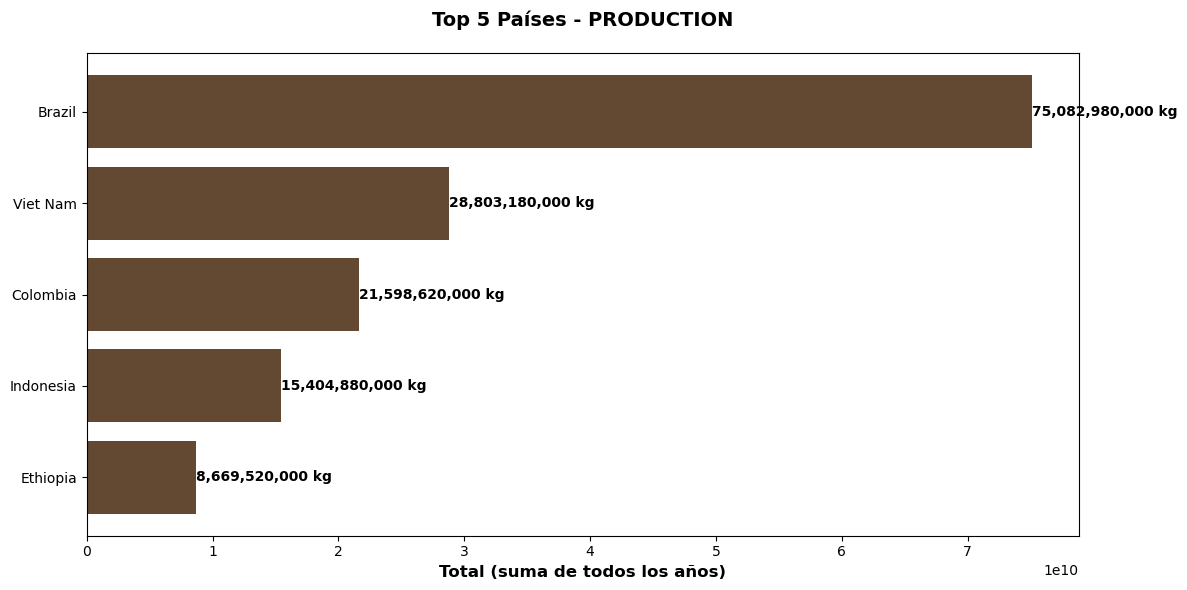

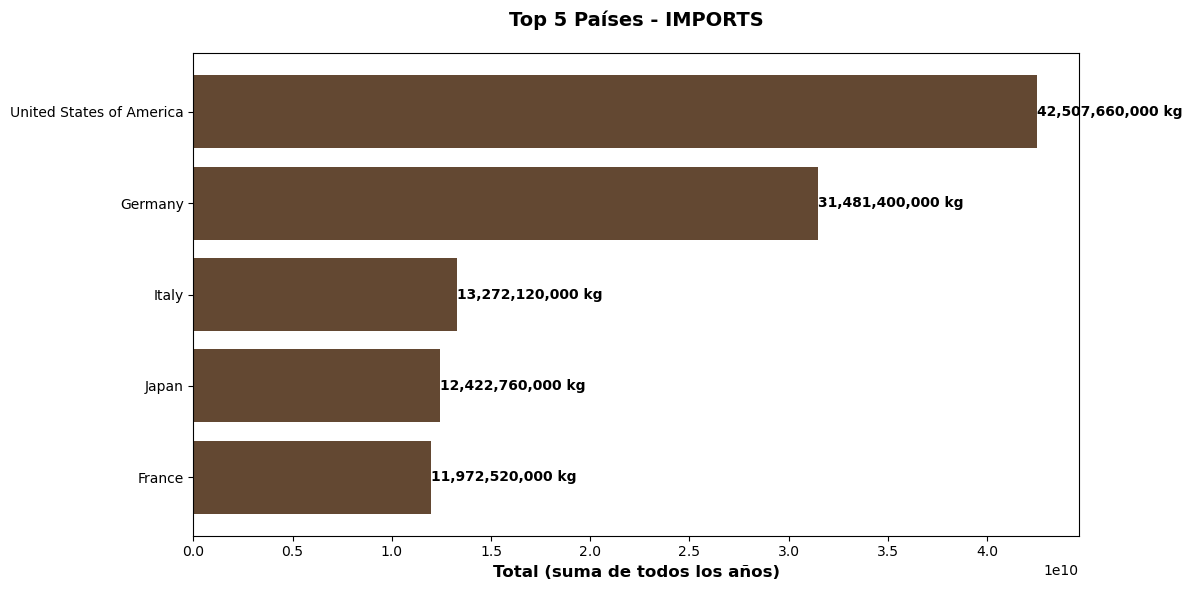

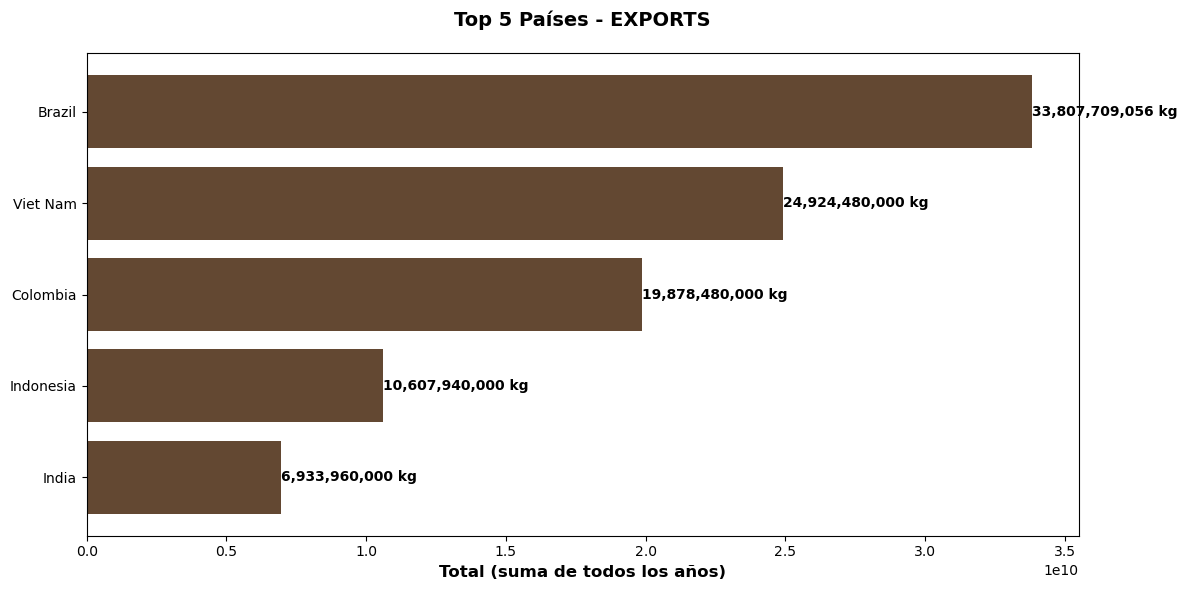

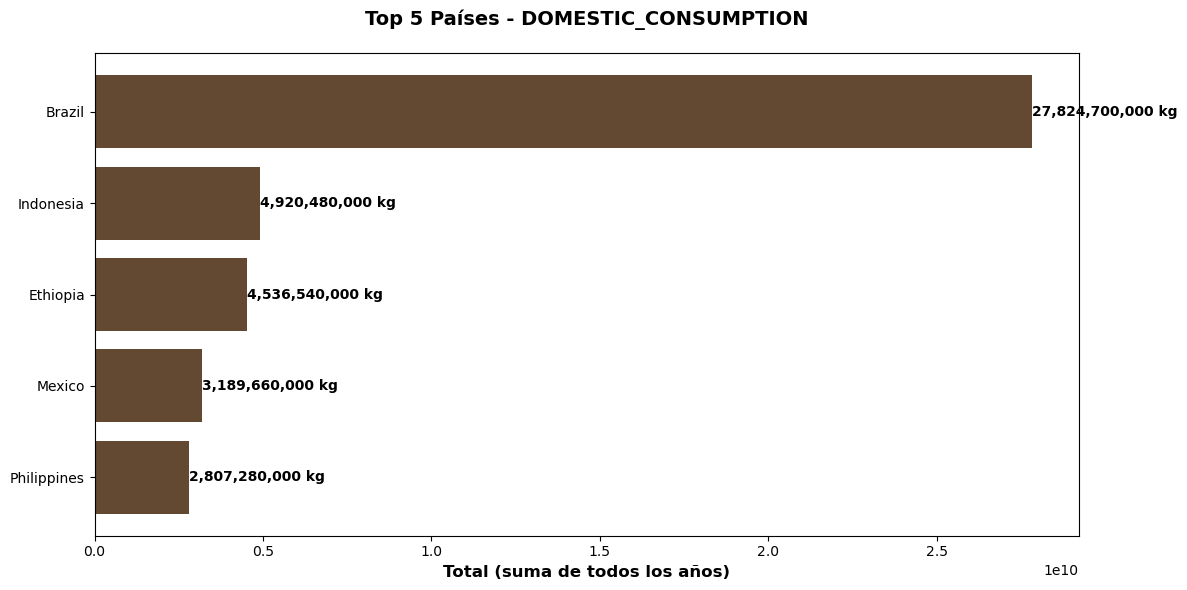

In [139]:
# Visualización de Top 5 países para tablas clave
def plot_top_countries(ranking_df, table_name, top_n=10):
    """Crea un gráfico de barras horizontales para el top N de países"""

    top = ranking_df.head(top_n).copy()
    # Preparar etiquetas
    labels = top['name'].fillna('Desconocido').astype(str)

    # Crear gráfico
    fig, ax = plt.subplots(figsize=(12, 6))
    y_pos = range(len(top))
    
    bars = ax.barh(y_pos, top['TOTAL'], color='#634832')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # Para que el #1 esté arriba
    ax.set_xlabel('Total (suma de todos los años)', fontsize=12, fontweight='bold')
    ax.set_title(f'Top {top_n} Países - {table_name.upper()}', 
                 fontsize=14, fontweight='bold', pad=20)
    
    # Añadir valores en las barras
    for i, (bar, val) in enumerate(zip(bars, top['TOTAL'])):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, 
                f'{val:,.0f} kg',
                ha='left', va='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Graficar las principales categorías
key_tables = ['production', 'imports', 'exports', 'domestic_consumption']

for table_name in key_tables:
    if table_name in rankings:
        plot_top_countries(rankings[table_name], table_name, top_n=5)

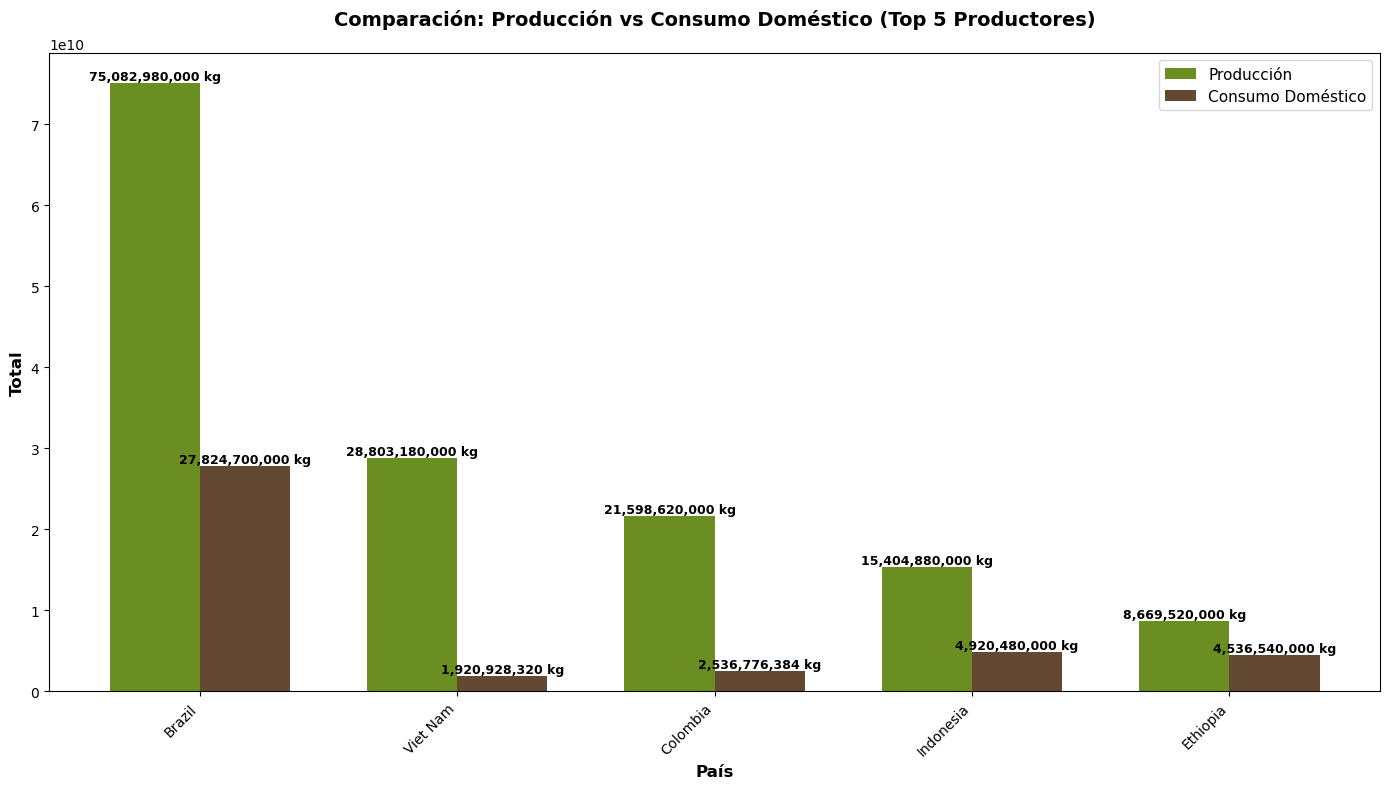

In [140]:
# Gráfico comparativo: Producción vs Consumo Doméstico
if 'production' in rankings and 'domestic_consumption' in rankings:
    prod_top = rankings['production'].head(15).copy()
    cons_top = rankings['domestic_consumption'].head(15).copy()
    
    # Merge ambos datasets
    comparison = prod_top[['name', 'TOTAL']].merge(
        cons_top[['name', 'TOTAL']],
        on='name',
        how='outer',
        suffixes=('_prod', '_cons')
    ).fillna(0)
    
    # Top 5 países por producción
    comparison = comparison.sort_values('TOTAL_prod', ascending=False).head(5)
    
    fig, ax = plt.subplots(figsize=(14, 8))
    x = range(len(comparison))
    width = 0.35
    
    bars1 = ax.bar([i - width/2 for i in x], comparison['TOTAL_prod'], 
                    width, label='Producción', color='#6B8E23')
    bars2 = ax.bar([i + width/2 for i in x], comparison['TOTAL_cons'], 
                    width, label='Consumo Doméstico', color='#634832')
    
    ax.set_xlabel('País', fontsize=12, fontweight='bold')
    ax.set_ylabel('Total', fontsize=12, fontweight='bold')
    ax.set_title('Comparación: Producción vs Consumo Doméstico (Top 5 Productores)', 
                    fontsize=14, fontweight='bold', pad=20)
    ax.set_xticks(x)
    ax.set_xticklabels(comparison['name'], rotation=45, ha='right')
    ax.legend(fontsize=11)
    
    # Añadir valores en las barras
    for bar in bars1:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f} kg',
                ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    for bar in bars2:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,.0f} kg',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print('Falta alguna de las tablas necesarias para la comparación')

## Análisis temporal (si hay columnas de año)

Exploraremos tendencias a lo largo del tiempo si las tablas contienen información temporal.


In [141]:
# Analizar tendencias temporales usando columnas de años (1990-2019)
def analyze_temporal_trends(table_name, df):
    """Analiza tendencias usando las columnas de años individuales"""
    # Buscar columnas de años específicos (1990-2019)
    year_cols = []

    for col_name in df.columns:
        if col_name in ["id", "country_id", "coffee_type", "total"]:
            continue
        year_cols.append(col_name)

    if not year_cols:
        print(f'  ⚠️  No se encontraron columnas de año en {table_name}')
        return None
    
    print(f'  ✅ Se encontraron {len(year_cols)} columnas de año en {table_name} (de {year_cols[0]} a {year_cols[-1]})')
    
    # Calcular totales por año (suma de todos los países)
    year_totals = []
    for year_col in year_cols:
        total = df[year_col].sum(skipna=True)
        year_totals.append({'Year': year_col, 'Total': total})
    
    return pd.DataFrame(year_totals)

print('-'*50)
print('📅 ANÁLISIS TEMPORAL (1990-2019)')
print('-'*50)

temporal_data = {}
for table_name, df in loaded.items():
    if table_name == 'countries':
        continue
    print(f'\n{table_name.upper()}:')
    trends = analyze_temporal_trends(table_name, df)
    if trends is not None:
        temporal_data[table_name] = trends
        display(trends.head(10))

--------------------------------------------------
📅 ANÁLISIS TEMPORAL (1990-2019)
--------------------------------------------------

PRODUCTION:
  ✅ Se encontraron 30 columnas de año en production (de 1990/91 a 2019/20)


,Year,Total
0,1990/91,5593800000
1,1991/92,6076140000
2,1992/93,5911260000
3,1993/94,5505540000
4,1994/95,5598840000
5,1995/96,5239260000
6,1996/97,6198660000
7,1997/98,5993220000
8,1998/99,6531960000
9,1999/00,7883040000



IMPORTS:
  ✅ Se encontraron 30 columnas de año en imports (de 1990 a 2019)


,Year,Total
0,1990,4447920000
1,1991,4276800000
2,1992,4752960000
3,1993,4627080000
4,1994,4501440000
5,1995,4342260000
6,1996,4671360000
7,1997,4863780000
8,1998,4966020000
9,1999,5125920000



EXPORTS:
  ✅ Se encontraron 30 columnas de año en exports (de 1990 a 2019)


,Year,Total
0,1990,4840440000
1,1991,4556580000
2,1992,4697760000
3,1993,4510020000
4,1994,4242480000
5,1995,4072440000
6,1996,4660140000
7,1997,4826280000
8,1998,4814520000
9,1999,5168400000



DOMESTIC_CONSUMPTION:
  ✅ Se encontraron 30 columnas de año en domestic_consumption (de 1990/91 a 2019/20)


,Year,Total
0,1990/91,1170552660
1,1991/92,1213685820
2,1992/93,1257087120
3,1993/94,1265874360
4,1994/95,1281609960
5,1995/96,1356154320
6,1996/97,1410755400
7,1997/98,1456262399
8,1998/99,1506995580
9,1999/00,1544472300



IMPORTER_CONSUMPTION:
  ✅ Se encontraron 30 columnas de año en importer_consumption (de 1990 a 2019)


,Year,Total
0,1990,3559380000
1,1991,3835860000
2,1992,3892740000
3,1993,4122360000
4,1994,3824520000
5,1995,3935580000
6,1996,4006740000
7,1997,3991380000
8,1998,4075620000
9,1999,4086000000



RE_EXPORTS:
  ✅ Se encontraron 30 columnas de año en re_exports (de 1990 a 2019)


,Year,Total
0,1990,526200000
1,1991,586140000
2,1992,641580000
3,1993,662340000
4,1994,769860000
5,1995,692400000
6,1996,749160000
7,1997,848160000
8,1998,908040000
9,1999,919740000


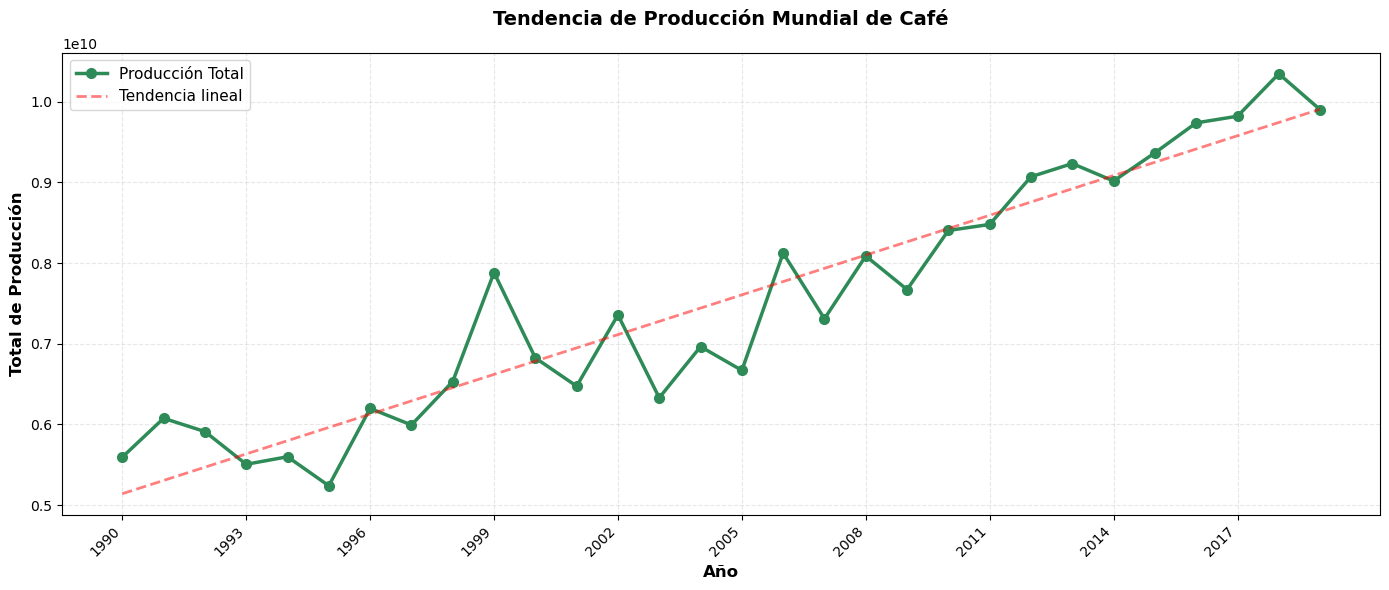


📊 Cambio en producción de 1990/91 a 2019/20:
   Inicial: 5,593,800,000
   Final: 9,903,180,000
   Cambio: 4,309,380,000 (+77.0%)


In [142]:
# Visualización de tendencias temporales para producción
trends = temporal_data['production'].copy()

# Extraer el año inicial del patrón "1990/91" -> 1990
trends['Year_numeric'] = trends['Year'].str.extract(r'(\d{4})')[0].astype(int)
trends = trends.sort_values('Year_numeric')

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(trends['Year_numeric'], trends['Total'], marker='o', linewidth=2.5, 
        markersize=7, color='#2E8B57', label='Producción Total')

ax.set_xlabel('Año', fontsize=12, fontweight='bold')
ax.set_ylabel('Total de Producción', fontsize=12, fontweight='bold')
ax.set_title('Tendencia de Producción Mundial de Café', 
                fontsize=14, fontweight='bold', pad=20)

# Mostrar algunos años en el eje X
years_to_show = trends['Year_numeric'].iloc[::3]  # Cada 3 años
ax.set_xticks(years_to_show)
ax.set_xticklabels(years_to_show, rotation=45, ha='right')

ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11)

# Añadir línea de tendencia
z = np.polyfit(trends['Year_numeric'], trends['Total'], 1)
p = np.poly1d(z)
ax.plot(trends['Year_numeric'], p(trends['Year_numeric']), "--", color='red', alpha=0.5, 
        linewidth=2, label=f'Tendencia lineal')
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

# Mostrar estadísticas de cambio
first_year = trends.iloc[0]
last_year = trends.iloc[-1]
change = last_year['Total'] - first_year['Total']
change_pct = (change / first_year['Total']) * 100
print(f"\n📊 Cambio en producción de {first_year['Year']} a {last_year['Year']}:")
print(f"   Inicial: {first_year['Total']:,.0f}")
print(f"   Final: {last_year['Total']:,.0f}")
print(f"   Cambio: {change:,.0f} ({change_pct:+.1f}%)")

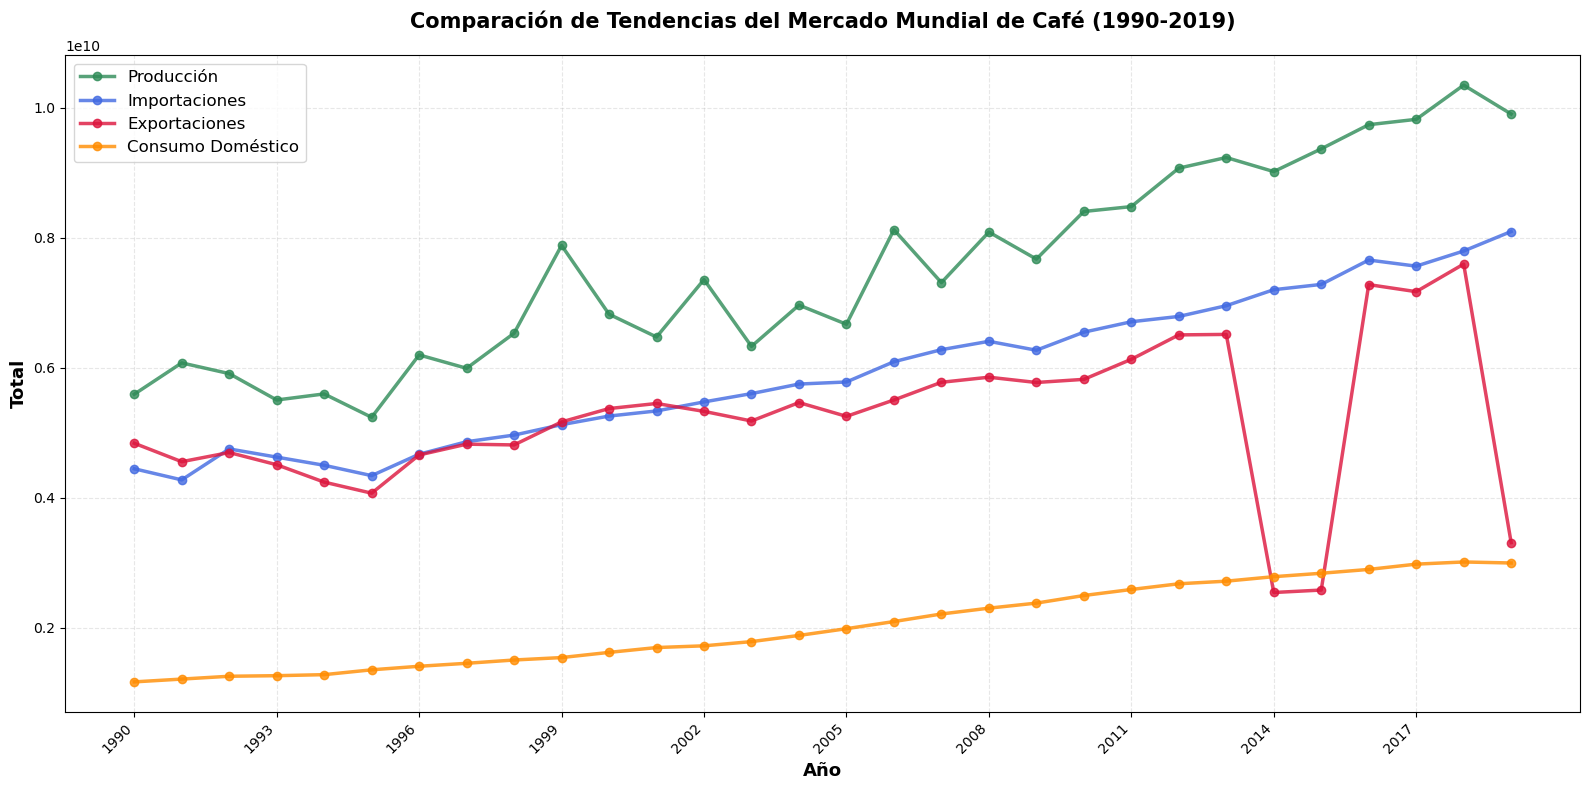


----------------------------------------------------------------------
📊 RESUMEN DE CAMBIOS (1990-2019)
----------------------------------------------------------------------


,Categoría,Inicial (1990),Final (2019),Cambio,Cambio %
0,Producción,"5,593,800,000","9,903,180,000","+4,309,380,000",+77.0%
1,Importaciones,"4,447,920,000","8,096,640,000","+3,648,720,000",+82.0%
2,Exportaciones,"4,840,440,000","3,312,036,352","-1,528,403,648",-31.6%
3,Consumo Doméstico,"1,170,552,660","2,998,891,440","+1,828,338,780",+156.2%


In [143]:
# Comparación de múltiples tendencias (Producción, Importaciones, Exportaciones)
comparison_tables = ['production', 'imports', 'exports', 'domestic_consumption']

# Filtrar solo las tablas que tienen datos temporales disponibles
available_trends = {
    table_name: trends_data 
    for table_name, trends_data in temporal_data.items() 
    if table_name in comparison_tables
}

fig, ax = plt.subplots(figsize=(16, 8))

colors = {
    'production': '#2E8B57', 
    'imports': '#4169E1', 
    'exports': '#DC143C', 
    'domestic_consumption': '#FF8C00'
}

labels = {
    'production': 'Producción', 
    'imports': 'Importaciones', 
    'exports': 'Exportaciones', 
    'domestic_consumption': 'Consumo Doméstico'
}

# Graficar cada tendencia
for table_name, trends in available_trends.items():
    trends_sorted = trends.copy()
    # Extraer el año inicial del patrón "1990/91" -> 1990
    trends_sorted['Year_numeric'] = trends_sorted['Year'].str.extract(r'(\d{4})')[0].astype(int)
    trends_sorted = trends_sorted.sort_values('Year_numeric')
    
    ax.plot(trends_sorted['Year_numeric'], trends_sorted['Total'], 
            marker='o', linewidth=2.5, markersize=6,
            color=colors.get(table_name, '#333333'),
            label=labels.get(table_name, table_name),
            alpha=0.8)

# Configurar ejes y título
ax.set_xlabel('Año', fontsize=13, fontweight='bold')
ax.set_ylabel('Total', fontsize=13, fontweight='bold')
ax.set_title('Comparación de Tendencias del Mercado Mundial de Café (1990-2019)', 
                fontsize=15, fontweight='bold', pad=20)

# Configurar marcas del eje X (mostrar cada 3 años)
if len(available_trends) > 0:
    first_table = list(available_trends.values())[0]
    first_table_copy = first_table.copy()
    first_table_copy['Year_numeric'] = first_table_copy['Year'].str.extract(r'(\d{4})')[0].astype(int)
    years = first_table_copy['Year_numeric'].sort_values()
    years_to_show = years.iloc[::3]
    ax.set_xticks(years_to_show)
    ax.set_xticklabels(years_to_show, rotation=45, ha='right')

ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=12, loc='best')

plt.tight_layout()
plt.show()

# Tabla resumen de cambios porcentuales
print('\n' + '-'*70)
print('📊 RESUMEN DE CAMBIOS (1990-2019)')
print('-'*70)

summary_data = []
for table_name, trends in available_trends.items():
    trends_sorted = trends.copy()
    trends_sorted['Year_numeric'] = trends_sorted['Year'].str.extract(r'(\d{4})')[0].astype(int)
    trends_sorted = trends_sorted.sort_values('Year_numeric')
    
    first = trends_sorted.iloc[0]['Total']
    last = trends_sorted.iloc[-1]['Total']
    change = last - first
    change_pct = (change / first) * 100 if first != 0 else 0
    
    summary_data.append({
        'Categoría': labels.get(table_name, table_name),
        'Inicial (1990)': f'{first:,.0f}',
        'Final (2019)': f'{last:,.0f}',
        'Cambio': f'{change:+,.0f}',
        'Cambio %': f'{change_pct:+.1f}%'
    })

summary_df = pd.DataFrame(summary_data)
display(summary_df)

## Resumen y conclusiones

### Estructura de datos confirmada:

- **Tablas principales**: `countries`, `production`, `imports`, `exports`, `domestic_consumption`, `importer_consumption`, `re_exports`
- **Columnas temporales**: Cada tabla (excepto `countries`) contiene columnas para años individuales desde 1990 hasta 2019
- **Columna total**: Cada tabla tiene una columna `total` que suma los valores de todos los años (1990-2019)
- **Relaciones**: Las tablas están relacionadas con `countries` mediante la columna `country_id`

### Hallazgos del análisis:

1. **Cobertura temporal**: Los datos abarcan 30 años (1990-2019), permitiendo análisis de tendencias a largo plazo
2. **Rankings por país**: Se identificaron los principales países productores, importadores y exportadores de café
3. **Tendencias temporales**: Las visualizaciones muestran la evolución del mercado mundial de café
4. **Comparaciones**: Se pueden analizar balances comerciales comparando producción vs consumo, exportaciones vs importaciones
